In [1]:
!ls ~/evals/eval_5refs_MORETYPES

args.pickle
astera-dragonDT_5hps_3hds_2lin_64hc__ub3_ep60.pt.dragon-ryder
binary_paths.csv
debug_vars.csv
dragon_aligned.csv
dragon_predictions.csv
ryder_aligned.csv


In [25]:
import pandas as pd
pd.set_option('display.max_colwidth', 20)   # JSON columns make things look weird in notebook without this

from pathlib import Path

from datatype_recovery.eval_dataset import PandasEvalMetrics

# df = pd.read_csv(Path.home()/'evals/eval_5refs_MORETYPES/astera-dragonDT_5hps_3hds_2lin_64hc__ub3_ep60.pt.dragon-ryder/predictions.csv')
# df = pd.read_csv(Path.home()/'evals/eval_5refs_MORETYPES/ryder_aligned.csv')
df = pd.read_csv(Path.home()/'evals/test_eval_MORETYPES/dragon_aligned.csv')
df

,BinaryId,FunctionStart,Signature,Vartype,NameStrip,LocationStrip,Pred,PredJson,NumOtherVars,NameDebug,LocationDebug,Type,TypeJson,TypeSeq,PredSeq
0,6,1089216,17,l,auStack_8,Stack[-0x8],STRUCT,"{""kind"": ""Struct...",3,auStack_8,Stack[-0x8],uchar[8],"{""kind"": ""ArrayT...","ARR,uchar",STRUCT
1,6,1089449,"16,28,52,76,101,...",l,local_c,Stack[-0xc],int32,"{""kind"": ""Builti...",3,i,Stack[-0xc],int32,"{""kind"": ""Builti...",int32,int32
2,6,1089449,42,p,param_2,LocType=register...,int32*,"{""kind"": ""Pointe...",1,a,LocType=register...,float*,"{""kind"": ""Pointe...","PTR,float","PTR,int32"
3,6,1089449,66,p,param_3,LocType=register...,int32*,"{""kind"": ""Pointe...",1,b,LocType=register...,float*,"{""kind"": ""Pointe...","PTR,float","PTR,int32"
4,6,1089449,90,p,param_1,LocType=register...,int32*,"{""kind"": ""Pointe...",1,r,LocType=register...,float*,"{""kind"": ""Pointe...","PTR,float","PTR,int32"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7173,6,1765287,"73,126,162,174,1...",l,local_5038,Stack[-0x5038],uint64,"{""kind"": ""Builti...",8,offset,Stack[-0x5038],int64,"{""kind"": ""Builti...",int64,uint64
7174,6,1765816,"34,39,79,84",l,piVar1,LocType=register...,int32*,"{""kind"": ""Pointe...",0,piVar2,LocType=register...,int32*,"{""kind"": ""Pointe...","PTR,int32","PTR,int32"
7175,6,1765816,"49,98,107,205,25...",p,param_1,LocType=register...,STRUCT*,"{""kind"": ""Pointe...",2,js,LocType=register...,_GLFWjoystick*,"{""kind"": ""Pointe...","PTR,STRUCT","PTR,STRUCT"
7176,6,1765816,"69,74",l,sVar2,LocType=register...,int64,"{""kind"": ""Builti...",1,sVar3,LocType=register...,int64,"{""kind"": ""Builti...",int64,int64


(0.0, 5.0)

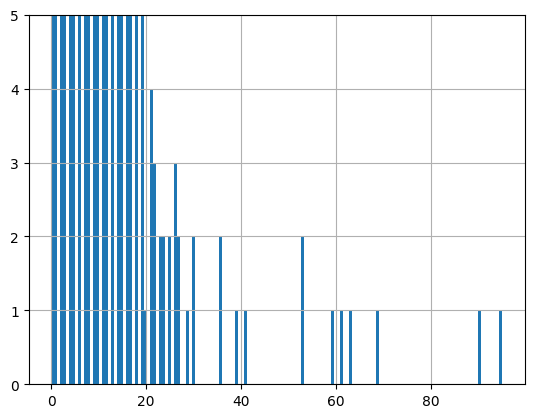

In [18]:
ax = df.NumOtherVars.hist(bins=150)
ax.set_ylim((0,5))
# dir(ax)

In [26]:
len(df[df.NumOtherVars<20])/len(df)

0.995263304541655

<Axes: xlabel='NumOtherVars'>

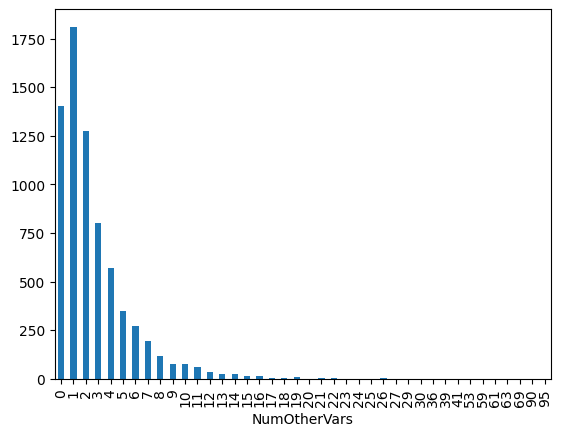

In [34]:
df.groupby('NumOtherVars').count()['BinaryId'].plot(kind='bar')

In [45]:
df[df.NumOtherVars<20]

,BinaryId,FunctionStart,Signature,Vartype,NameStrip,LocationStrip,Pred,PredJson,NumOtherVars,NameDebug,LocationDebug,Type,TypeJson,TypeSeq,PredSeq
0,6,1089216,17,l,auStack_8,Stack[-0x8],STRUCT,"{""kind"": ""Struct...",3,auStack_8,Stack[-0x8],uchar[8],"{""kind"": ""ArrayT...","ARR,uchar",STRUCT
1,6,1089449,"16,28,52,76,101,...",l,local_c,Stack[-0xc],int32,"{""kind"": ""Builti...",3,i,Stack[-0xc],int32,"{""kind"": ""Builti...",int32,int32
2,6,1089449,42,p,param_2,LocType=register...,int32*,"{""kind"": ""Pointe...",1,a,LocType=register...,float*,"{""kind"": ""Pointe...","PTR,float","PTR,int32"
3,6,1089449,66,p,param_3,LocType=register...,int32*,"{""kind"": ""Pointe...",1,b,LocType=register...,float*,"{""kind"": ""Pointe...","PTR,float","PTR,int32"
4,6,1089449,90,p,param_1,LocType=register...,int32*,"{""kind"": ""Pointe...",1,r,LocType=register...,float*,"{""kind"": ""Pointe...","PTR,float","PTR,int32"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7173,6,1765287,"73,126,162,174,1...",l,local_5038,Stack[-0x5038],uint64,"{""kind"": ""Builti...",8,offset,Stack[-0x5038],int64,"{""kind"": ""Builti...",int64,uint64
7174,6,1765816,"34,39,79,84",l,piVar1,LocType=register...,int32*,"{""kind"": ""Pointe...",0,piVar2,LocType=register...,int32*,"{""kind"": ""Pointe...","PTR,int32","PTR,int32"
7175,6,1765816,"49,98,107,205,25...",p,param_1,LocType=register...,STRUCT*,"{""kind"": ""Pointe...",2,js,LocType=register...,_GLFWjoystick*,"{""kind"": ""Pointe...","PTR,STRUCT","PTR,STRUCT"
7176,6,1765816,"69,74",l,sVar2,LocType=register...,int64,"{""kind"": ""Builti...",1,sVar3,LocType=register...,int64,"{""kind"": ""Builti...",int64,int64


<Axes: xlabel='NumOtherVars'>

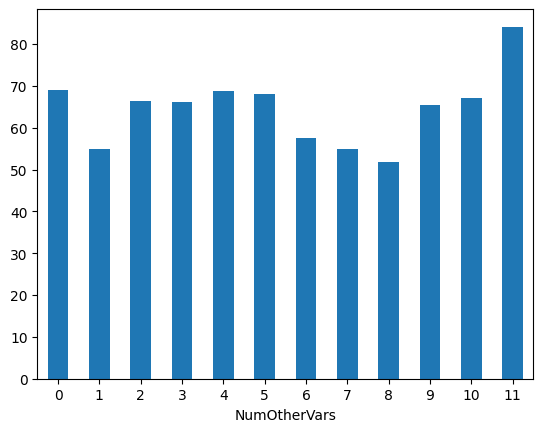

In [48]:
# df.groupby('Gen').apply(lambda df: PandasEvalMetrics(df, 'TypeSeq', 'PredSeq').accuracy).plot(kind='bar',rot=0,ylabel='Accuracy')
df[df.NumOtherVars<12].groupby('NumOtherVars').apply(lambda df: PandasEvalMetrics(df,'TypeSeq','PredSeq').accuracy*100).plot(
    rot=0, kind='bar'
)

In [24]:
# df.columns
# TODO: - what is the accuracy of Gen1 vs. Gen2?????

df.groupby('Gen').pipe(lambda gb: [
    (PandasEvalMetrics(x[1], truth_col='TypeSeq', pred_col='PredSeq').accuracy, x[0]) for x in gb
])

KeyError: 'Gen'

<Axes: xlabel='Gen', ylabel='Accuracy'>

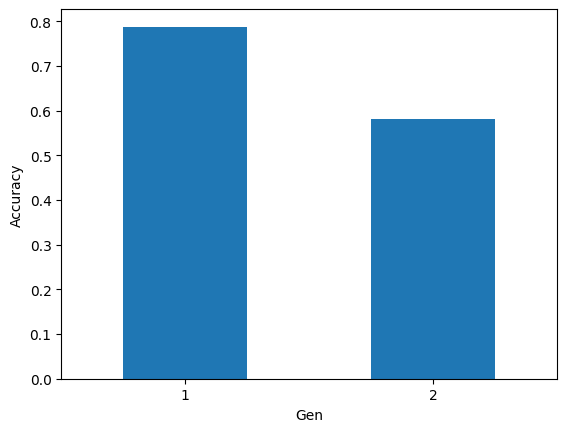

In [25]:
df.groupby('Gen').apply(lambda df: PandasEvalMetrics(df, 'TypeSeq', 'PredSeq').accuracy).plot(kind='bar',rot=0,ylabel='Accuracy')

<Axes: xlabel='Gen', ylabel='# Variables'>

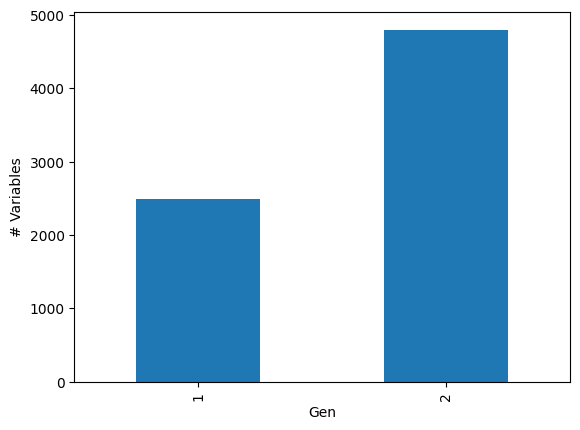

In [29]:
df.groupby('Gen').count()['BinaryId'].plot(kind='bar',ylabel='# Variables')

In [41]:
df.groupby('Gen').apply(lambda df: (df.Retyped.sum(), df.Retyped.sum()/len(df)*100))

Gen
1    (2465, 98.956242...
2    (4673, 97.394747...
dtype: object